In [1]:
resolution = '2.2km'

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Function to calculate PDF from a single file
def calculate_pdf(file_name, bins=50):
    # Get the data
    precipitation_data = np.load(file_name)
    # 
    #    freqs, bin_edges = np.histogram(precipitation_data, bins=bins, density=True)
    freqs, bin_edges = np.histogram(precipitation_data, bins=bins_i_want, density=True)
    # I think this was just for knowing how many value was in each bin
    # How was I using that in log_discrete_histogram_less_legend???
    # freqs_numbers, bin_edges = np.histogram(precipitation_data, bins= bins, density=False)
    
    #n_bins = str(len(bin_edges))
    # Find the centre point of each bin for plotting
    bin_centres =  0.5*(bin_edges[1:] + bin_edges[:-1])    
    
    return freqs, bin_centres


# Function to calculate PDF from a single file
def calculate_pdf_wetvalues (file_name, bins=50):
    # Get the data
    precipitation_data = np.load(file_name)
    # Remove NAN values
    precipitation_data = precipitation_data[~np.isnan(precipitation_data)]
    # Keep only wet values 
    precipitation_data = precipitation_data[precipitation_data >= 0.1]
    #
    freqs, bin_edges = np.histogram(precipitation_data, bins=bins_i_want, density=True)
    # I think this was just for knowing how many value was in each bin
    # How was I using that in log_discrete_histogram_less_legend???
    # freqs_numbers, bin_edges = np.histogram(precipitation_data, bins= bins, density=False)
    
    # 
    #n_bins = str(len(bin_edges))
    # Find the centre point of each bin for plotting
    bin_centres =  0.5*(bin_edges[1:] + bin_edges[:-1])    
    
    return freqs, bin_centres

In [3]:
# Issue with this is that the bin centres is based on the final one

## Overlapping time period
### UKCP18 2.2km - 30 mins

In [2]:
bin_num = 8
bins_i_want =  [3, 7, 10,15, 21, 35,45, 62, 78]

In [30]:
# # Initialize variables to accumulate PDF
total_pdf_wv_2_2km_o = np.zeros(bin_num)  # Assuming 50 bins for the histogram
total_bin_centers_wv_2_2km_o = None
ems=  ['bc005',  'bc006',  'bc007', 'bc009',  'bc010', 
       'bc011', 'bc013',  'bc015',  'bc016',  'bc017', 'bc018', 'bc012']
ems=  ['bc005']
# Process each file and accumulate PDF
for em in ems:
    print(em)
    datadir = f"/nfs/a319/gy17m2a/PhD/ProcessedData/TimeSeries/UKCP18_every30mins/2.2km_bng_masked/2002_2020/{em}_wholeyear/"
    for yr in range(2006,2020):
        file_name = datadir + f"{yr}_compressed.npy"
        pdf_wv_2_2km, bin_centers_wv_2_2km = calculate_pdf_wetvalues(file_name)
        total_pdf_wv_2_2km_o += pdf_wv_2_2km
        total_bin_centers_wv_2_2km_o= bin_centers_wv_2_2km

bc005


### NIMROD - 2.2km

In [11]:
# Initialize variables to accumulate PDF
total_pdf_nimrod_wv_o = np.zeros(bin_num)  # Assuming 50 bins for the histogram
total_bin_centers_nimrod_wv_o = None
 
# Process each file and accumulate PDF
datadir = f'/nfs/a319/gy17m2a/PhD/ProcessedData/TimeSeries/NIMROD/30mins/NIMROD_regridded_2.2km/'
for yr in range(2006,2018):
    print(yr)
    file_name = datadir + f"compressed_{yr}.npy"
    pdf_nimrod_wv, bin_centers_nimrod_wv = calculate_pdf_wetvalues(file_name)
    total_pdf_nimrod_wv_o += pdf_nimrod_wv
    total_bin_centers_nimrod_wv_o = bin_centers_nimrod_wv

2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017


## Not overlapping period

In [16]:
# # Initialize variables to accumulate PDF
# total_pdf_wv_2_2km_no = np.zeros(bin_num)  # Assuming 50 bins for the histogram
# total_bin_centers_wv_2_2km_no = None
# # ems=  ['bc005',  'bc006',  'bc007', 'bc009',  'bc010', 
# #        'bc011', 'bc013',  'bc015',  'bc016',  'bc017', 'bc018', 'bc012']
# # Process each file and accumulate PDF
# for em in ems:
#     print(em)
#     datadir = f"/nfs/a319/gy17m2a/PhD/ProcessedData/TimeSeries/UKCP18_every30mins/2.2km_bng_masked/2002_2020/{em}_wholeyear/"
#     for yr in range(2001,2020):
#         file_name = datadir + f"compressed_{yr}.npy"
#         pdf_wv_2_2km, bin_centers_wv_2_2km = calculate_pdf_wetvalues(file_name)
#         total_pdf_wv_2_2km_no += pdf_wv_2_2km
#         total_bin_centers_wv_2_2km_no = bin_centers_wv_2_2km
#         # print(bin_centers)          

In [17]:
# # Initialize variables to accumulate PDF
# total_pdf_nimrod_wv_no = np.zeros(bin_num)  # Assuming 50 bins for the histogram
# total_bin_centers_nimrod_wv_no = None
 
# # Process each file and accumulate PDF
# datadir = f'/nfs/a319/gy17m2a/PhD/ProcessedData/TimeSeries/NIMROD/30mins/NIMROD_regridded_2.2km/'
# for yr in range(2006,2020):
#     print(yr)
#     file_name = datadir + f"compressed_{yr}.npy"
#     pdf_nimrod_wv, bin_centers_nimrod_wv = calculate_pdf_wetvalues(file_name)
#     total_pdf_nimrod_wv_no += pdf_nimrod_wv
#     total_bin_centers_nimrod_wv_no = bin_centers_nimrod_wv

In [23]:
total_pdf_nimrod_wv_o

array([nan, nan, nan, nan, nan, nan, nan, nan])

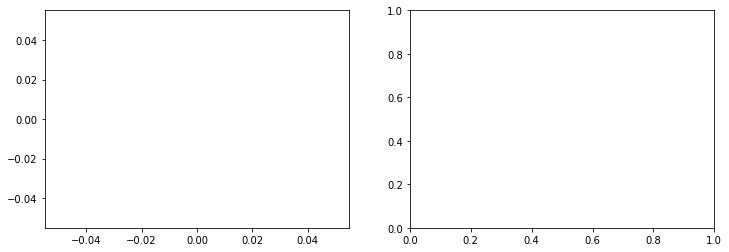

In [24]:
# Draw the plot
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12,4))

axs[0].scatter(total_bin_centers_nimrod_wv_o, total_pdf_nimrod_wv_o ,linewidth = 1,s=3, color = 'darkgreen')
axs[0].plot(total_bin_centers_nimrod_wv_o, total_pdf_nimrod_wv_o ,linewidth = 1, color = 'darkgreen')
axs[0].scatter(total_bin_centers_wv_2_2km_o, total_pdf_wv_2_2km_o ,linewidth = 1,s=3, color = 'orange')
axs[0].plot(total_bin_centers_wv_2_2km_o, total_pdf_wv_2_2km_o ,linewidth = 1, color = 'orange')

# axs[1].scatter(total_bin_centers_nimrod_wv_no, total_pdf_nimrod_wv_no ,linewidth = 1,s=3, color = 'darkgreen')
# axs[1].plot(total_bin_centers_nimrod_wv_no, total_pdf_nimrod_wv_no ,linewidth = 1, color = 'darkgreen')
# axs[1].scatter(total_bin_centers_wv_2_2km_no, total_pdf_wv_2_2km_no ,linewidth = 1,s=3, color = 'orange')
# axs[1].plot(total_bin_centers_wv_2_2km_no, total_pdf_wv_2_2km_no ,linewidth = 1, color = 'orange')

# Create patches
patches= []
patch1 = mpatches.Patch(color= 'darkgreen', label='NIMROD regridded 2.2km')
patch2 = mpatches.Patch(color= 'darkorange', label='UKCP18 2.2km')
patches.append(patch1)
patches.append(patch2)

# axs[0].legend(handles=patches)
# axs[0].set_ylabel('Probability density')
# axs[0].set_ylim(1e-7,100)
# axs[0].set_yscale('log')
# axs[0].set_xscale('linear')    
# axs[0].set_title('overlapping period')

# axs[1].legend(handles=patches)
# axs[1].set_ylabel('Probability density')
# axs[1].set_ylim(1e-7,100)
# axs[1].set_yscale('log')
# axs[1].set_xscale('linear')    
# axs[1].set_title('Not overlapping period')
# fig.savefig("Scripts/UKCP18_Validation/PrecipitationPDFs/leeds-at-centre/Figs/RCMvsCPMvsObs/NIMRODvsUKCP18_2.2km_3,7bins.png")